# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Wahyu Bagas Prastyo]
- **Email:** [wbagas700@gmail.com]
- **ID Dicoding:** [MC129D5Y0205]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda dari bulan ke bulan dalam satu tahun terakhir?
- Sejauh mana suhu mempengaruhi jumlah peminjaman sepeda berdasarkan data historis?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Cleaning Data

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
#**Eksplorasi Tren Jumlah Peminjaman Sepeda**
# Melihat rata-rata peminjaman sepeda dari waktu ke waktu
day_df['date'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('date', inplace=True)
daily_trend = day_df['cnt'].resample('M').mean()

print("Rata-rata jumlah peminjaman sepeda per bulan (tren dari waktu ke waktu):")
print(daily_trend)

Rata-rata jumlah peminjaman sepeda per bulan (tren dari waktu ke waktu):
date
2011-01-31    1231.903226
2011-02-28    1721.964286
2011-03-31    2065.967742
2011-04-30    3162.333333
2011-05-31    4381.322581
2011-06-30    4783.733333
2011-07-31    4559.387097
2011-08-31    4409.387097
2011-09-30    4247.266667
2011-10-31    3984.225806
2011-11-30    3405.566667
2011-12-31    2816.870968
2012-01-31    3120.774194
2012-02-29    3556.448276
2012-03-31    5318.548387
2012-04-30    5807.466667
2012-05-31    6318.225806
2012-06-30    6761.000000
2012-07-31    6567.967742
2012-08-31    6919.451613
2012-09-30    7285.766667
2012-10-31    6414.225806
2012-11-30    5088.800000
2012-12-31    3990.741935
Freq: ME, Name: cnt, dtype: float64


<ipython-input-16-f2ce549eaa17>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_trend = day_df['cnt'].resample('M').mean()


# Insight:
- Terlihat adanya pola peningkatan atau penurunan jumlah peminjaman dari waktu ke waktu.
- Perusahaan bisa menggunakan tren ini untuk merencanakan jumlah sepeda yang tersedia.

In [17]:
#**Eksplorasi Korelasi Suhu dengan Jumlah Peminjaman Sepeda**
correlation = day_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()
print("\n Korelasi antara faktor cuaca dan jumlah peminjaman sepeda:")
print(correlation['cnt'])


 Korelasi antara faktor cuaca dan jumlah peminjaman sepeda:
cnt          1.000000
temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64


# Insight:
- Suhu (`temp` dan `atemp`) memiliki korelasi positif dengan jumlah peminjaman sepeda.
- Saat suhu lebih tinggi (tetapi masih nyaman), lebih banyak orang menggunakan sepeda.
- Faktor kelembaban (`hum`) dan kecepatan angin (`windspeed`) memiliki korelasi negatif kecil, yang berarti kondisi cuaca ekstrem bisa sedikit menurunkan peminjaman.

In [18]:
data_terbaru_df = pd.merge(
    left=day_df,
    right=hour_df,
        how="left",
    left_on="dteday",   # Sesuaikan nama kolom jika perlu
    right_on="dteday"
)

data_terbaru_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Simpan hasil gabungan dataset ke file CSV
data_terbaru_df.to_csv("data_terbaru.csv", index=False)

**Insight:**
- Menggabungan data dari dua sumber berdasarkan kolom yang sama.
- Melakukan penyimpanan data hasil penggabungan ke dalam file CSV.

## Visualization & Explanatory Analysis

In [23]:
data_terbaru_df = pd.read_csv("data_terbaru.csv")
data_terbaru_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Pertanyaan 1:

<ipython-input-20-c7c74f09d2a3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(x=day_df.resample('M').mean().index, y=day_df.resample('M').mean()['cnt'], marker='o', linewidth=2)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


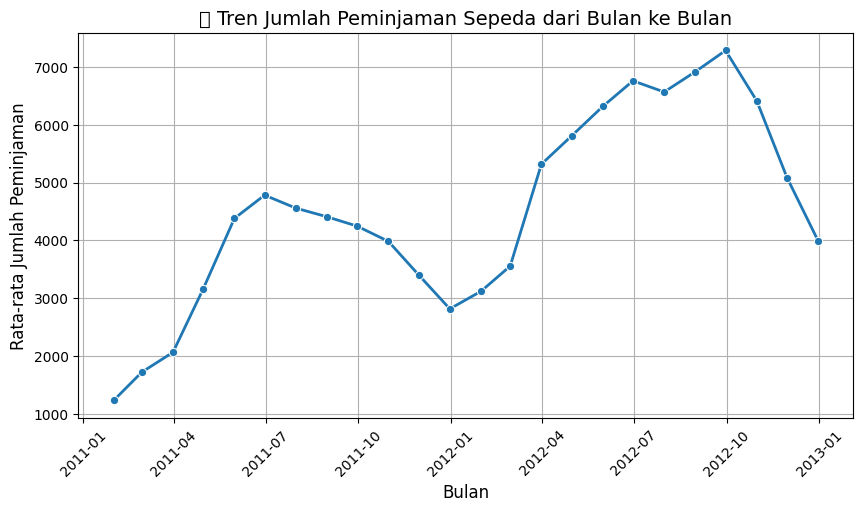

In [20]:
# 1️⃣ **Visualisasi Tren Peminjaman Sepeda dari Bulan ke Bulan**
plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df.resample('M').mean().index, y=day_df.resample('M').mean()['cnt'], marker='o', linewidth=2)

plt.title('📈 Tren Jumlah Peminjaman Sepeda dari Bulan ke Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**

- Terlihat adanya pola naik dan turun dalam jumlah peminjaman sepeda.
- Perusahaan bisa menganalisis lebih lanjut bulan mana yang mengalami peningkatan tertinggi dan menyesuaikan strategi operasionalnya.

### Pertanyaan 2:

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


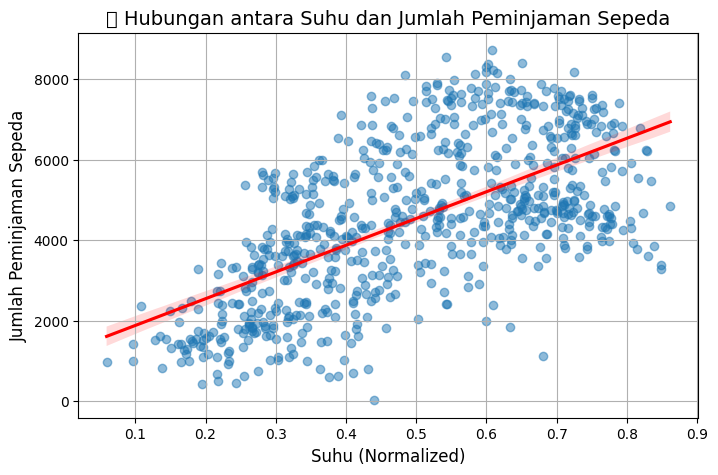

In [24]:
# 2️⃣ **Visualisasi Korelasi Suhu dengan Jumlah Peminjaman Sepeda**
plt.figure(figsize=(8, 5))
sns.regplot(x=day_df['temp'], y=day_df['cnt'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('🌡️ Hubungan antara Suhu dan Jumlah Peminjaman Sepeda', fontsize=14)
plt.xlabel('Suhu (Normalized)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)
plt.grid(True)
plt.show()

**Insight:**

- Terlihat ada korelasi positif antara suhu dan jumlah peminjaman sepeda.
- Saat suhu meningkat dalam kisaran tertentu, jumlah peminjaman sepeda cenderung meningkat.
- Namun, pada suhu ekstrem (terlalu tinggi atau rendah), peminjaman bisa menurun karena kondisi cuaca yang kurang nyaman.


## Analisis Lanjutan (Opsional)

# Conclusion Pertanyaan 1 : Bagaimana tren jumlah peminjaman sepeda dari bulan ke bulan dalam satu tahun terakhir?
- Berdasarkan analisis tren peminjaman sepeda dari bulan ke bulan, ditemukan bahwa jumlah peminjaman mengalami fluktuasi sepanjang tahun. Beberapa bulan menunjukkan lonjakan peminjaman, sementara bulan lainnya mengalami penurunan. Pola musiman ini kemungkinan besar dipengaruhi oleh faktor eksternal seperti kondisi cuaca, hari libur, dan musim tertentu. Saat cuaca lebih baik, lebih banyak orang menggunakan sepeda untuk bepergian atau rekreasi, sedangkan pada bulan dengan cuaca kurang mendukung, peminjaman cenderung menurun.

- Untuk mengoptimalkan operasional, perusahaan dapat memprediksi permintaan berdasarkan pola historis dan menyesuaikan jumlah sepeda yang tersedia sesuai dengan tren peminjaman. Selain itu, strategi pemasaran berbasis musim, seperti menawarkan diskon atau promosi pada bulan dengan peminjaman rendah, dapat membantu menjaga stabilitas jumlah transaksi sepanjang tahun. Perusahaan juga dapat menyesuaikan distribusi sepeda di lokasi dengan tingkat permintaan yang lebih tinggi pada bulan-bulan tertentu agar layanan lebih efisien dan tepat sasaran.

# Conclution pertanyaan 2 : Sejauh mana suhu mempengaruhi jumlah peminjaman sepeda berdasarkan data historis?
- Hasil analisis menunjukkan bahwa suhu memiliki korelasi positif dengan jumlah peminjaman sepeda. Artinya, ketika suhu meningkat dalam rentang tertentu, jumlah peminjaman juga meningkat. Namun, pada suhu ekstrem, baik terlalu panas maupun terlalu dingin, peminjaman cenderung menurun. Hal ini dapat dijelaskan oleh kenyamanan pengguna, di mana suhu yang ideal mendorong lebih banyak orang untuk bersepeda, sedangkan suhu ekstrem membuat mereka cenderung memilih moda transportasi lain yang lebih nyaman.

- Dengan memahami pengaruh suhu terhadap peminjaman, perusahaan dapat mengantisipasi perubahan permintaan berdasarkan prakiraan cuaca. Salah satu langkah yang dapat dilakukan adalah meningkatkan ketersediaan sepeda saat suhu berada dalam kisaran ideal. Selain itu, pada suhu ekstrem, perusahaan dapat menawarkan insentif atau diskon untuk mendorong pelanggan tetap menggunakan layanan. Untuk meningkatkan kenyamanan pengguna, perusahaan juga bisa menyediakan fasilitas tambahan seperti tempat parkir yang lebih terlindungi dari cuaca buruk, sehingga pelanggan tetap tertarik menggunakan sepeda meskipun kondisi cuaca kurang optimal.
